# Problem Statement

## Business Scenario

A diamond merchant has come to you for help.

They want to create an automated system to predict the apt price of a diamond based on its shape/size/color etc.

They have shared the shape/size/color data of 53940 diamonds.

Your task is to create a machine learning model which can predict the price of a diamond based on its characteristics.

### About Dataset

* **carat:** Weight(0.2 to 5.01) of the diamond
* **cut:** Quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* **color:** Diamond colour from J(worst) to D(best)
* **clarity:** Measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* **x:** Length(0 to 10.74) in mm 
* **y:** Width(0 to 58.9) in mm 
* **z:** Depth(0 to 31.8) in mm 
* **depth %:** The height of a diamond, measured from the culet to the table, divided by its average girdle diameter. Total depth percentage(43 to 79) = z/mean(x,y) = 2\*z/(x+y)
* **table:** Width(43 to 95) of the top of diamond relative to widest point 
* **price:** Price in US dollar

### Defining the problem statement:
Create a ML model which can predict the price of a diamond
Target Variable: price
Predictors: color, cut, carat ,clarity,x ,y ,z ,depth and table.

### Determining the type of Machine Learning
Based on the problem statement we can understand that we need to create a supervised ML Regression model, as the target variable is Continuous.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.metrics import SCORERS
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


# Reading a Data Set

In [2]:
df=pd.read_csv('DiamondsPrices.csv')

# Understanding the Dataset

In [3]:
#checking the rows of a dataset
print('Dataset shape: ',df.shape)

Dataset shape:  (53940, 10)


In [4]:
# Printing top 5 rows of a dataset
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
#printing bottom rows of a dataset
df.tail()


,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


##### Checking Null values

In [6]:
#Checking if there any null values in my dataset?
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### Checking Outliers 

In [7]:
#checking for outliers in  columns
Q3=df.quantile(0.75)
Q1=df.quantile(0.25)
IQR=Q3-Q1
df=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

print('Shape after dropping Dataset',df.shape)
print('dropped Rows :' ,53940-47524)

Shape after dropping Dataset (47524, 10)
dropped Rows : 6416


#### Checking Kurtosis 

In [25]:
df.kurtosis()

carat    -0.443044
depth     0.012704
table    -0.179328
price     0.643087
x        -1.118211
y        -1.126873
z        -1.124594
price1   -1.223975
dtype: float64

#### Checking skewness

In [26]:
#checking if I have a skewed data or not?
df.skew()

carat     0.688048
depth    -0.242816
table     0.387534
price     1.200428
x         0.250465
y         0.244291
z         0.244618
price1    0.067337
dtype: float64

### Looking at the distribution of Target variable
If target variable's distribution is too skewed then the predictive modeling will not be possible.

Bell curve is desirable but slightly positive skew or negative skew is also fine

##### Applying Log transformation

In [10]:
# Applying log transformation
df['price1']=np.log(df['price'])

<AxesSubplot:xlabel='price1', ylabel='Count'>

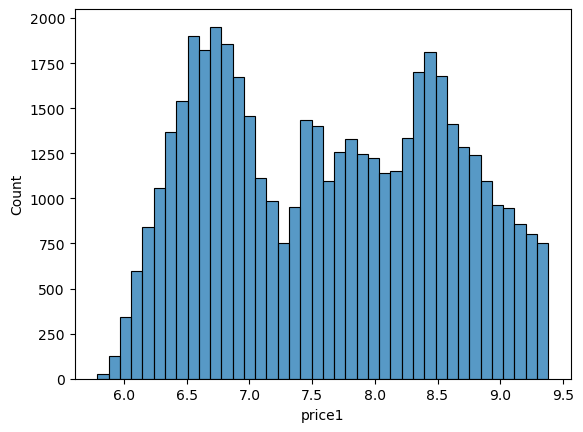

In [11]:
sns.histplot(data=df,x=df['price1'])

In [30]:
df.drop(labels='price',inplace=True,axis=1)

## Inference
The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from. It is slightly positively skewed. which is acceptable.

0.24429102898497193

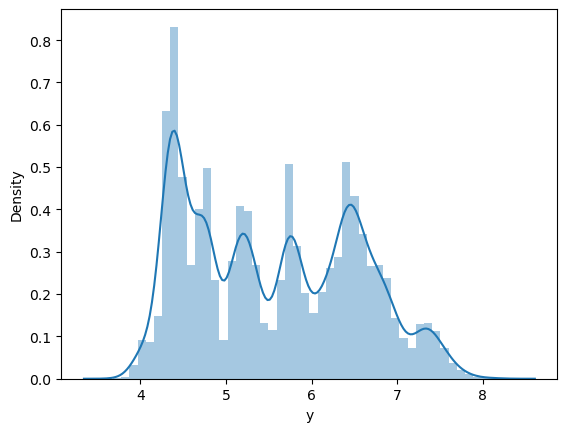

In [31]:
#distribution plot of y
sns.distplot(df['y'])
df['y'].skew()

0.24461844605818128

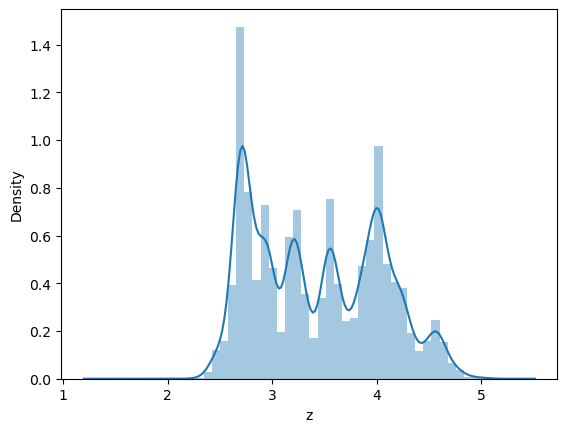

In [32]:
# Distribution plot of z
sns.distplot(df['z'])
df['z'].skew()

0.2504653375210917

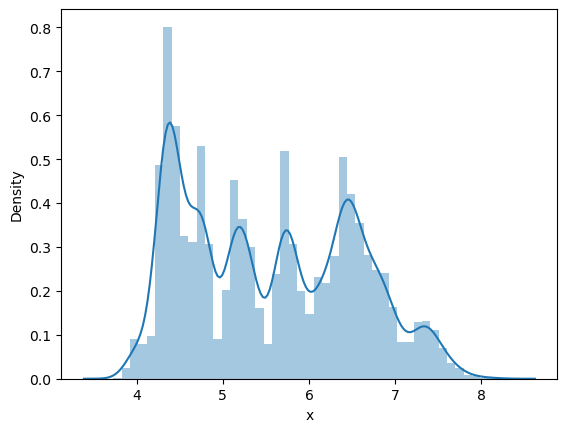

In [33]:
#distribution plot of x
sns.distplot(df['x'])
df['x'].skew()

0.06733746992623652

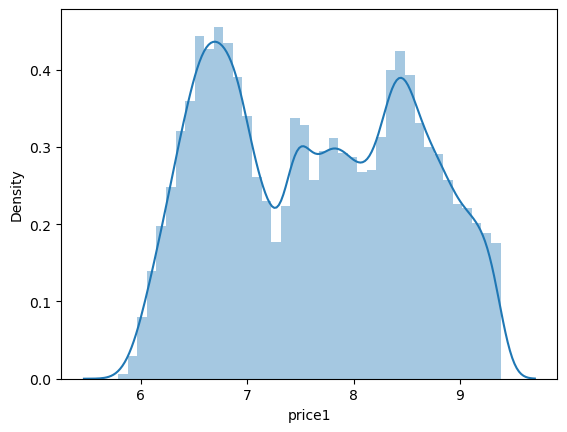

In [35]:
#Distribution plot of price
sns.distplot(df['price1'])
df['price1'].skew()

0.38753355530108524

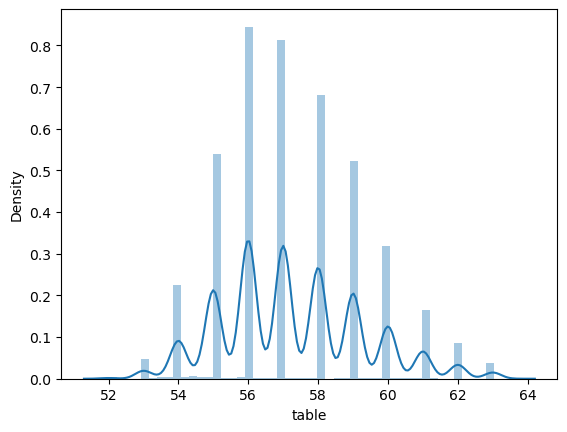

In [36]:
#Distribution plot of table
sns.distplot(df['table'])
df['table'].skew()

-0.24281630606696092

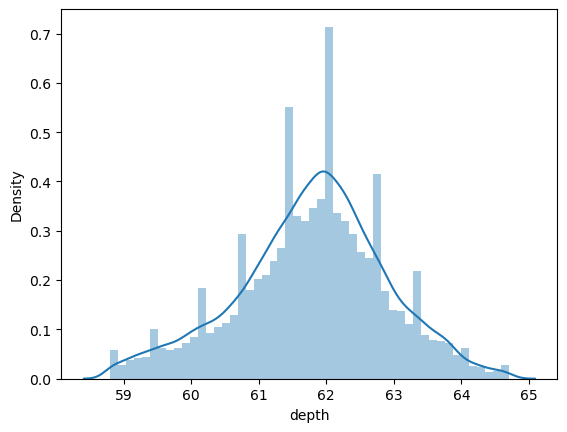

In [37]:
# Distribution plot of depth
sns.distplot(df['depth'])
df['depth'].skew()

0.6880483334188302

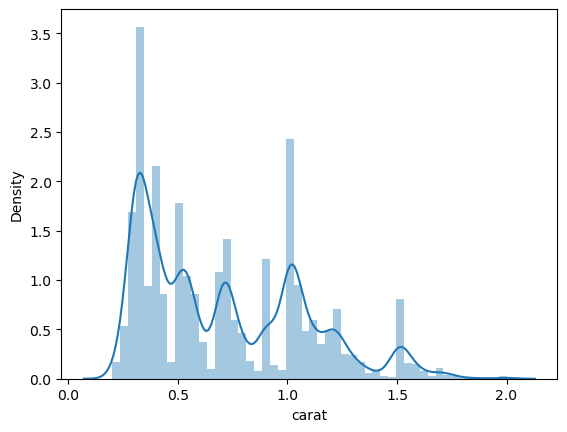

In [38]:
#Distribution plot of carat
sns.distplot(df['carat'])
df['carat'].skew()

#### Checking Duplicated values 

In [39]:
#checking if we have any duplicate values in dataset?
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,x,y,z,price1


In [40]:
#Dropping Duplicated rows
df.drop_duplicates(inplace=True)

#Shape of dataset after dropping duplicated rows
print('Rows in dataset after dropping duplicated rows :',47524-112)

#shape of Dataframe after deleting the outliers
print('shape of data frame after dropping outliers :',df.shape)

Rows in dataset after dropping duplicated rows : 47412
shape of data frame after dropping outliers : (47412, 10)


In [41]:
#checking the descriptive summary numerical columns
df.describe()

,carat,depth,table,x,y,z,price1
count,47412.000000,47412.000000,47412.000000,47412.000000,47412.000000,47412.000000,47412.000000
mean,0.708891,61.785926,57.261603,5.547276,5.552146,3.428745,7.638956
std,0.370974,1.106231,2.021752,0.979628,0.973734,0.606007,0.926031
min,0.200000,58.800000,52.000000,3.730000,3.680000,1.410000,5.786897
25%,0.380000,61.100000,56.000000,4.640000,4.650000,2.860000,6.792344
50%,0.600000,61.900000,57.000000,5.440000,5.460000,3.360000,7.632401
75%,1.010000,62.500000,59.000000,6.410000,6.410000,3.980000,8.441823
max,2.000000,64.700000,63.500000,8.280000,8.270000,5.300000,9.382864


In [42]:
#checking the descriptive summary categorical columns
df.describe(include='object')

,cut,color,clarity
count,47412,47412,47412
unique,5,7,8
top,Ideal,G,SI1
freq,20278,10056,11524


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47412 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    47412 non-null  float64
 1   cut      47412 non-null  object 
 2   color    47412 non-null  object 
 3   clarity  47412 non-null  object 
 4   depth    47412 non-null  float64
 5   table    47412 non-null  float64
 6   x        47412 non-null  float64
 7   y        47412 non-null  float64
 8   z        47412 non-null  float64
 9   price1   47412 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.0+ MB


# EDA

# Univariate Analysis

In [24]:
#checking the descriptive summary numerical columns
#statistical measures of data
df.describe()

,carat,depth,table,price,x,y,z,price1
count,47412.000000,47412.000000,47412.000000,47412.000000,47412.000000,47412.000000,47412.000000,47412.000000
mean,0.708891,61.785926,57.261603,3111.518645,5.547276,5.552146,3.428745,7.638956
std,0.370974,1.106231,2.021752,2750.147119,0.979628,0.973734,0.606007,0.926031
min,0.200000,58.800000,52.000000,326.000000,3.730000,3.680000,1.410000,5.786897
25%,0.380000,61.100000,56.000000,891.000000,4.640000,4.650000,2.860000,6.792344
50%,0.600000,61.900000,57.000000,2064.000000,5.440000,5.460000,3.360000,7.632401
75%,1.010000,62.500000,59.000000,4637.000000,6.410000,6.410000,3.980000,8.441823
max,2.000000,64.700000,63.500000,11883.000000,8.280000,8.270000,5.300000,9.382864


### checking the descriptive summary categorical columns

In [187]:
#statistical measure of categorical feature
df.describe(include='object')

,cut,color,clarity
count,47412,47412,47412
unique,5,7,8
top,Ideal,G,SI1
freq,20278,10056,11524


##### For categorical columns 
we can create a barplot or count plot.
##### Categorical Predictors: 'cut', 'color', 'clarity'

### Countplot

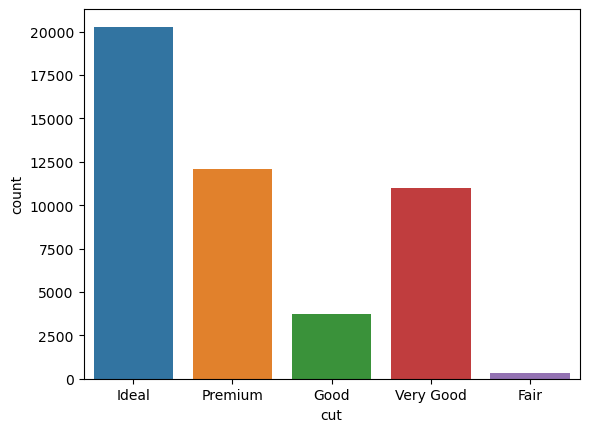

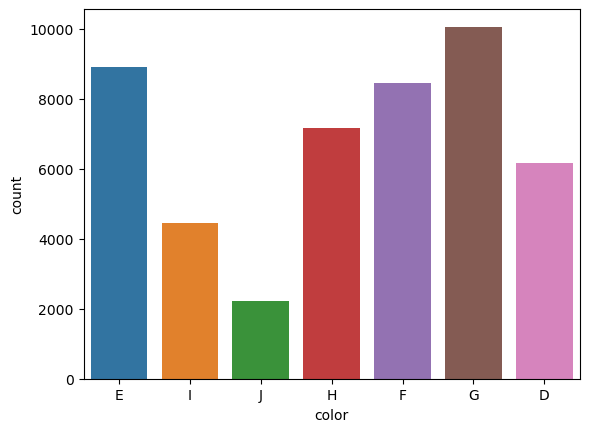

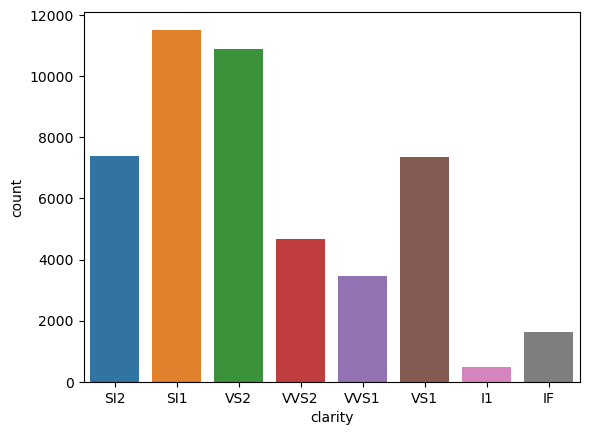

In [188]:
#countplot:
for col in df.select_dtypes(include='object'):
    sns.countplot(data=df.select_dtypes(include='object'),x=col)
    plt.show()

### Interpretation
IN cut Ideal has highest frequency and is about 20000, while fair has lowest frequency

IN color G has the highrest Frequency and is about 10000, while J has lowest of 2000

In clarity SI1 has highest frequency and is around 12000, while l1 has lowest frequency 

#### For Numerical Columns

#### Distribution plot of all continuos preedictors:

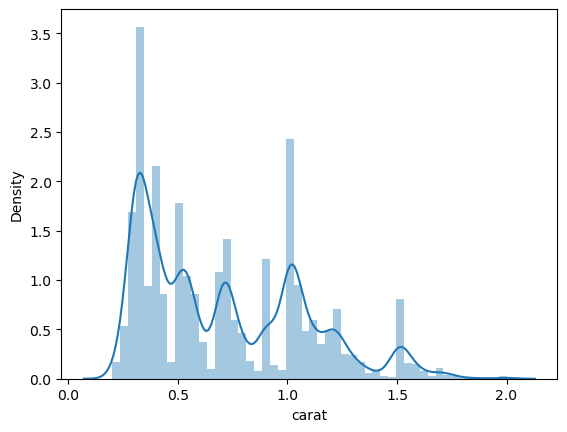

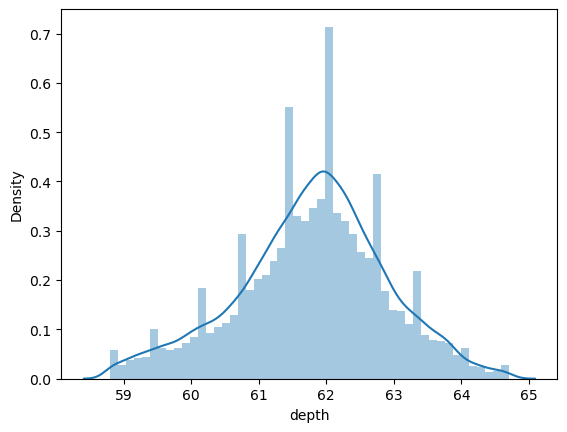

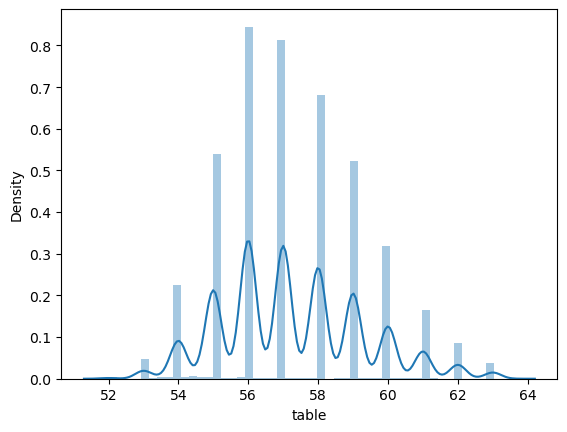

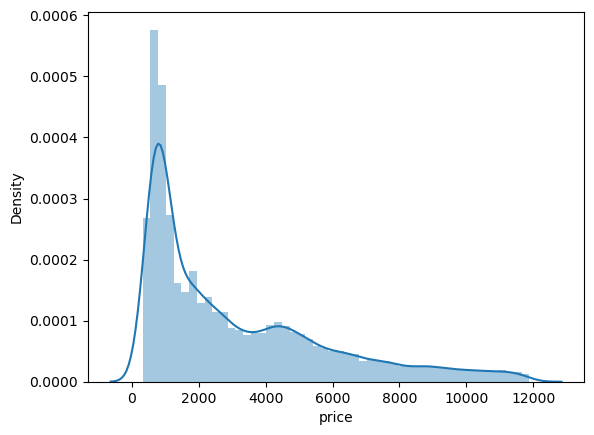

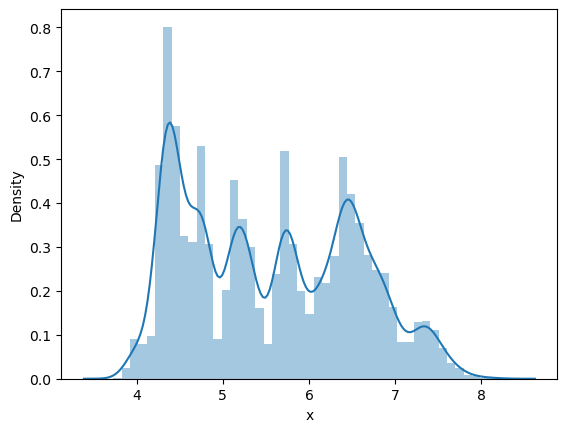

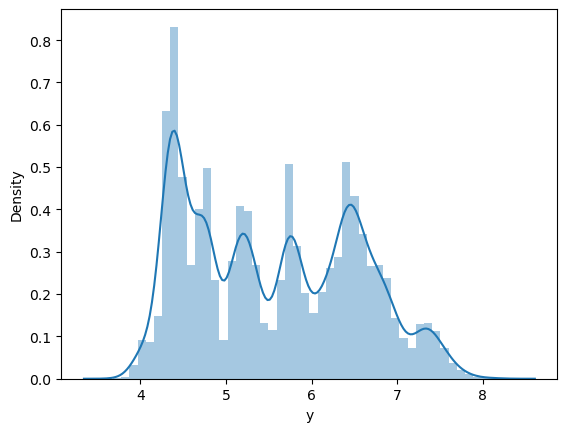

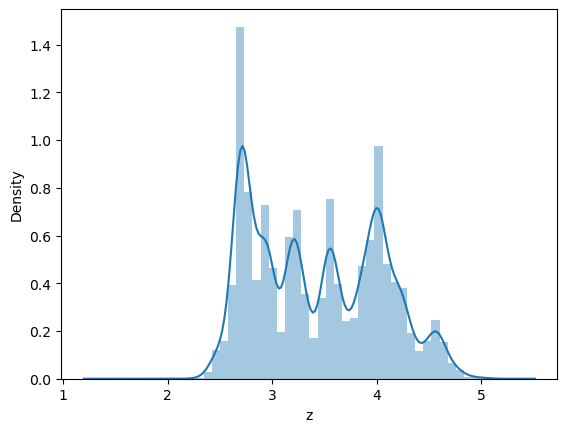

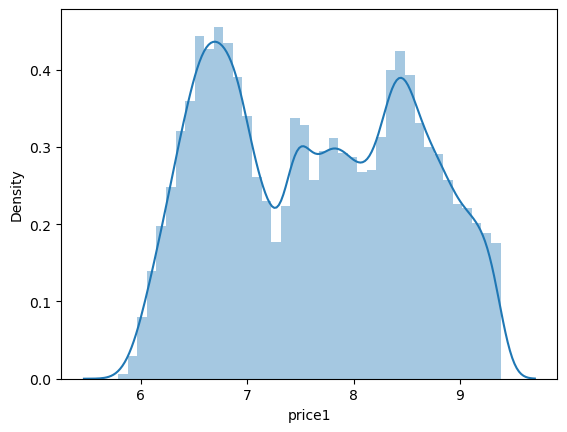

In [189]:
#Distribution plot of all continuos preedictors:
for col in df.select_dtypes(include='number'):
    sns.distplot(a=df[col])
    plt.show()

### Inference:
Price column is right skewed.

#### Histogram for all numerical variables

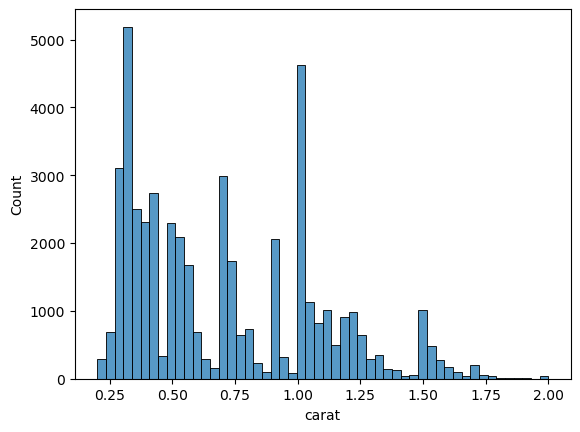

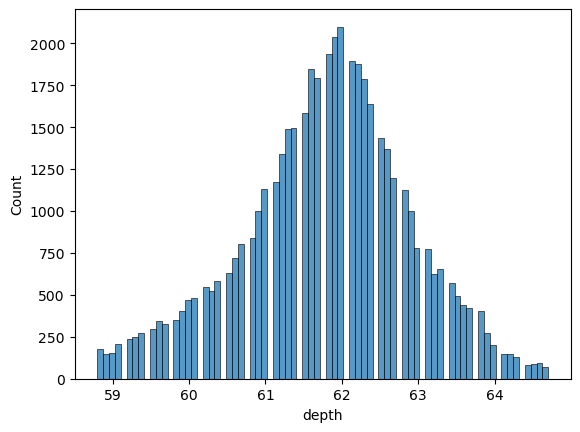

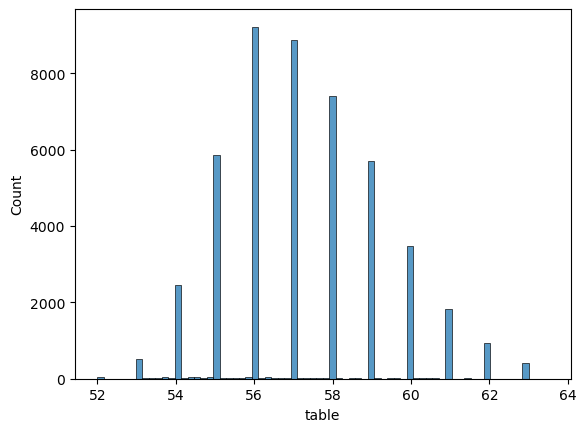

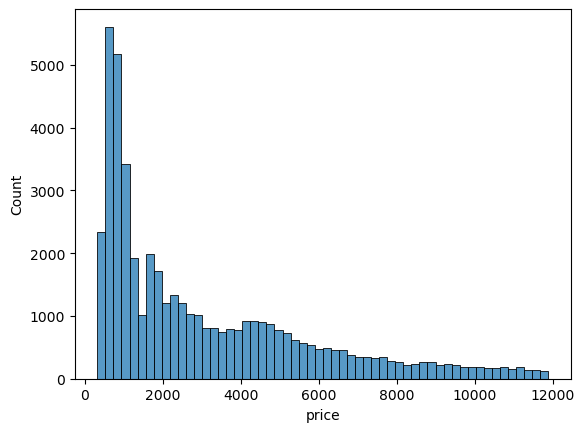

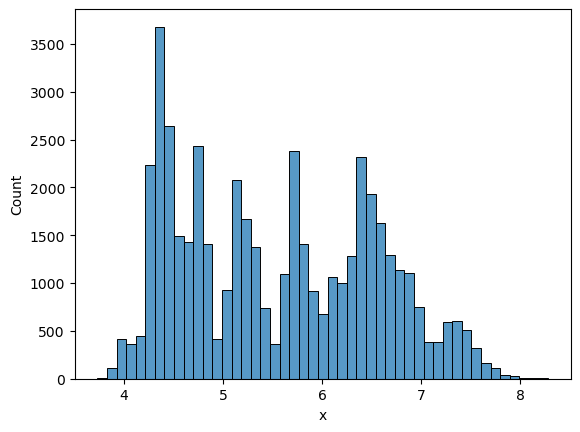

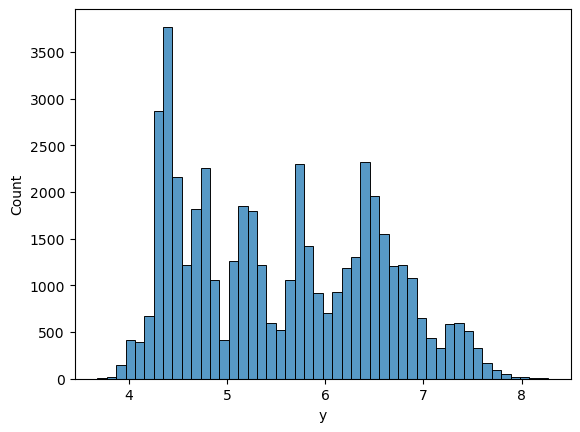

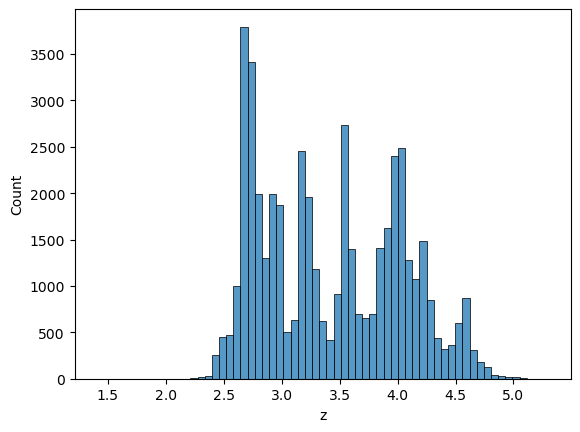

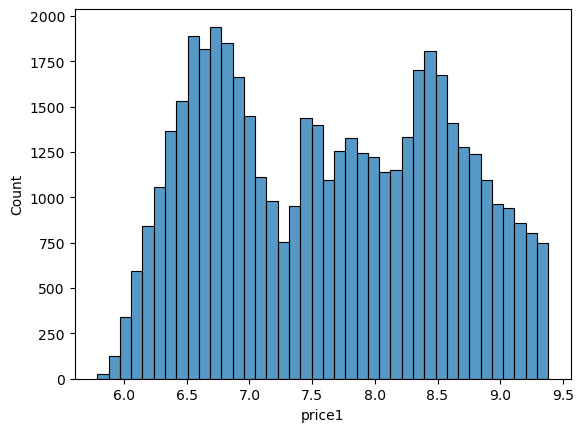

In [190]:
#Histogram
for col in df.select_dtypes(include='number'):
    sns.histplot(data=df.select_dtypes(include='number'),x=col)
    plt.show()

# Multivariate Analysis

### Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

## Scatter Plot

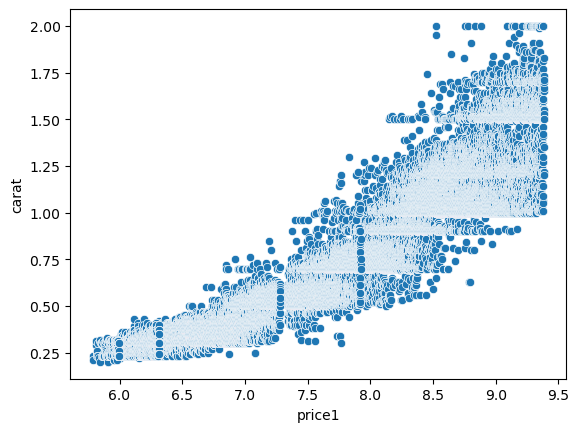

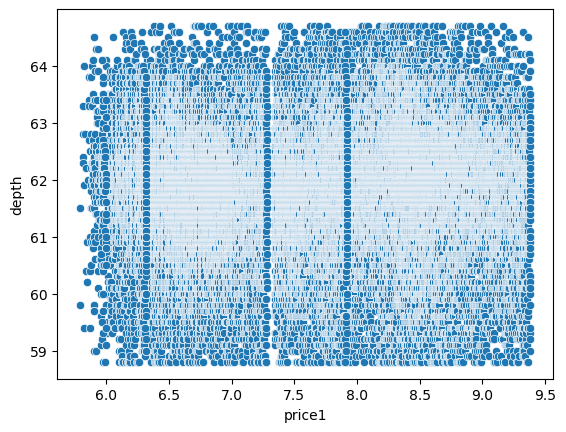

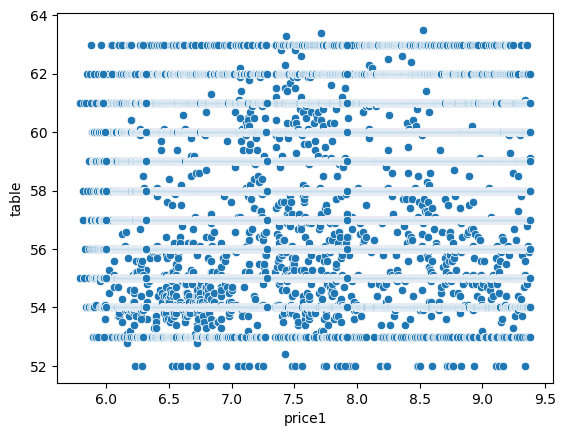

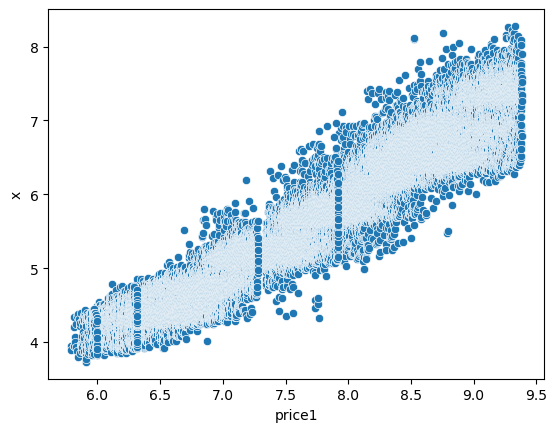

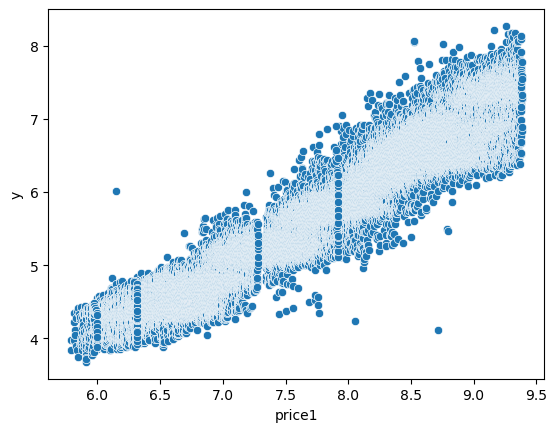

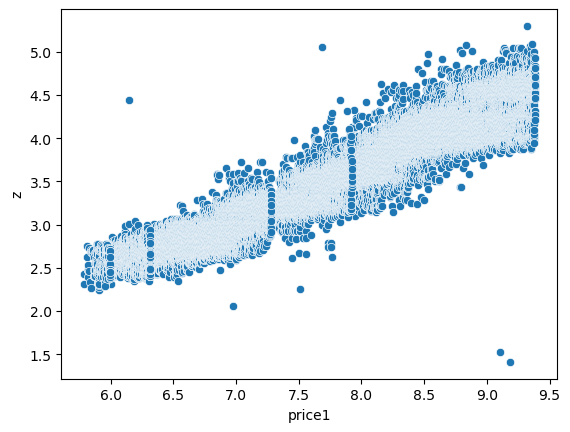

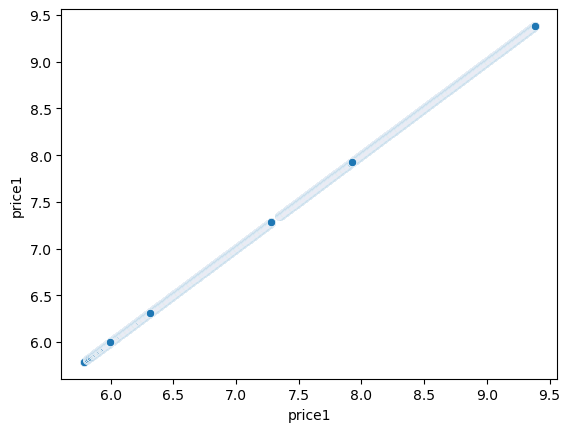

In [45]:
#scatter plot for continuos predictors and tager variables:
for col in df.select_dtypes(include='number'):
    sns.scatterplot(x=df['price1'],y=df[col], palette='#00FF00')
    plt.show()

### Checking correlation

In [113]:
# Checking the Correlation 
df_corr=df.corr()

In [114]:
df_corr

,carat,depth,table,price,x,y,z,price1
carat,1.000000,0.036227,0.186638,0.922932,0.986280,0.985451,0.985073,0.937323
depth,0.036227,1.000000,-0.240451,0.006450,-0.010184,-0.011842,0.093079,0.011728
table,0.186638,-0.240451,1.000000,0.136226,0.185722,0.180274,0.158430,0.153860
price,0.922932,0.006450,0.136226,1.000000,0.899821,0.900957,0.896542,0.925106
x,0.986280,-0.010184,0.185722,0.899821,1.000000,0.998532,0.993341,0.960728
y,0.985451,-0.011842,0.180274,0.900957,0.998532,1.000000,0.993163,0.960909
z,0.985073,0.093079,0.158430,0.896542,0.993341,0.993163,1.000000,0.957665
price1,0.937323,0.011728,0.153860,0.925106,0.960728,0.960909,0.957665,1.000000


<AxesSubplot:>

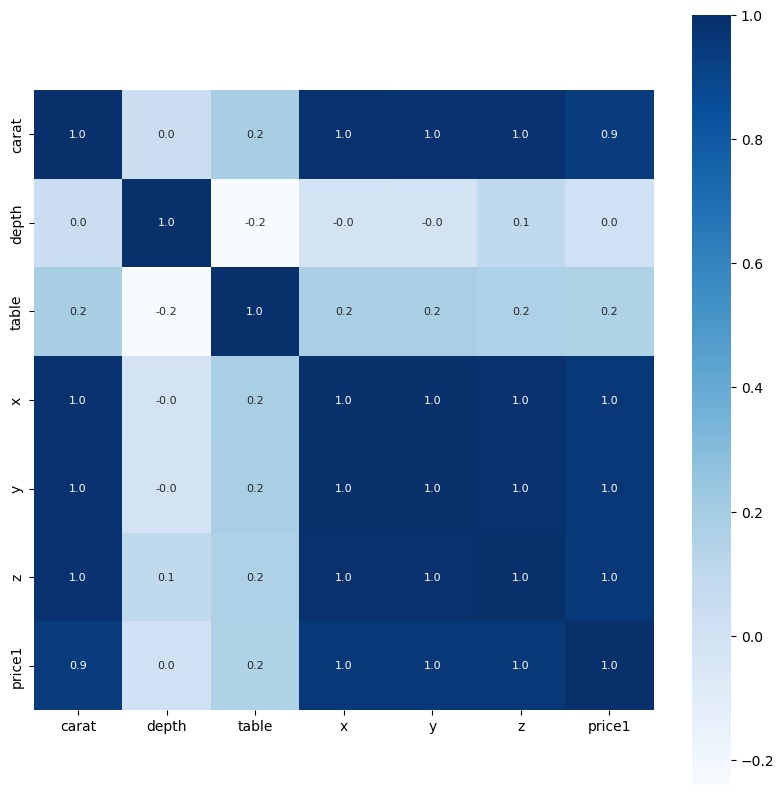

In [46]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


'carat', 'x','y','z' have very high positive correlation with target variable.Therefore, they can used while building the model.

### Calculating VIF

In [47]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical columns from your dataset
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Add a constant term to the numerical columns
X_with_constant = sm.add_constant(numerical_columns)

# Calculate VIF for each numerical feature
vif = pd.DataFrame()
vif["Variable"] = X_with_constant.columns
vif["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]



In [48]:
# Print the VIF values
vif

,Variable,VIF
0,const,24773.807717
1,carat,43.613628
2,depth,6.864703
3,table,1.128666
4,x,499.195394
5,y,481.971280
6,z,527.251580
7,price1,14.276076


### Reducing three variables x, y, z to a single variable

In [49]:
#Reducing three variables x, y, z to a single variable
df['volume']= df['x']*df['y']*df["z"] 

#now we can drop x,y,z columns
df=df.drop(['x','y','z'], axis=1)

#Visualizing the data frame to see the change
df.head()

,carat,cut,color,clarity,depth,table,price1,volume
0,0.23,Ideal,E,SI2,61.5,55.0,5.786897,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,5.786897,34.505856
3,0.29,Premium,I,VS2,62.4,58.0,5.811141,46.724580
4,0.31,Good,J,SI2,63.3,58.0,5.814131,51.917250
5,0.24,Very Good,J,VVS2,62.8,57.0,5.817111,38.693952


#### calculating the vif to see how multicolinerity has changed

In [50]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical columns from your dataset
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Add a constant term to the numerical columns
X_with_constant = sm.add_constant(numerical_columns)

# Calculate VIF for each numerical feature
vif_1 = pd.DataFrame()
vif_1["Variable"] = X_with_constant.columns
vif_1["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]



In [51]:
vif_1

,Variable,VIF
0,const,7299.103016
1,carat,663.456470
2,depth,1.325092
3,table,1.316834
4,price1,8.353532
5,volume,659.489253


<AxesSubplot:>

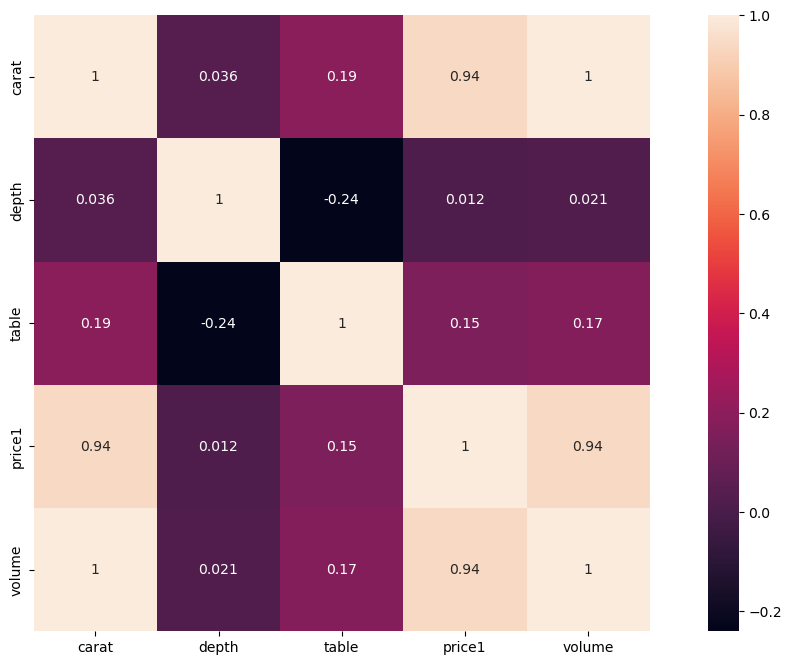

In [52]:
#Plot heat map to see the correlation among the variables
corr = df.corr()
plt.figure(figsize = (15,8)) #To set the figure size
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

##### Inference
It is observed that the independent variable volume and carat have a strong correlation. So volume column is dropped before regression is implemented.

#### Droping volume

In [53]:
df=df.drop(['volume'], axis=1)

In [54]:
df.head(2) #Visualize the dataframe

,carat,cut,color,clarity,depth,table,price1
0,0.23,Ideal,E,SI2,61.5,55.0,5.786897
1,0.21,Premium,E,SI1,59.8,61.0,5.786897


### Calculating the VIF after dropping the volume

In [55]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical columns from your dataset
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Add a constant term to the numerical columns
X_with_constant = sm.add_constant(numerical_columns)

# Calculate VIF for each numerical feature
vif_2 = pd.DataFrame()
vif_2["Variable"] = X_with_constant.columns
vif_2["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]



In [56]:
vif_2

,Variable,VIF
0,const,5714.577169
1,carat,8.458750
2,depth,1.076359
3,table,1.113426
4,price1,8.323048


In [57]:
df.head(1)

,carat,cut,color,clarity,depth,table,price1
0,0.23,Ideal,E,SI2,61.5,55.0,5.786897


# Data Preprocessing


### Segregating Numerical and categorical columns 

 #### Data preprocessing involves:
Imputation of missing values

Imputation of duplicate values

Imputation of outliers

Transformation of skewed data

Scaling the numerical columns

Encoding the categorical columns

In [58]:
Selected=['carat','cut', 'color', 'clarity','depth','table']

# # Selecting final columns
df_Selected=df[Selected]
df_Selected

,carat,cut,color,clarity,depth,table
0,0.23,Ideal,E,SI2,61.5,55.0
1,0.21,Premium,E,SI1,59.8,61.0
3,0.29,Premium,I,VS2,62.4,58.0
4,0.31,Good,J,SI2,63.3,58.0
5,0.24,Very Good,J,VVS2,62.8,57.0
...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0
53936,0.72,Good,D,SI1,63.1,55.0
53937,0.70,Very Good,D,SI1,62.8,60.0
53938,0.86,Premium,H,SI2,61.0,58.0


In [59]:
#Segregating Numerical and categorical columns

#segregating the categorical columns
categorical_cols=df_Selected.select_dtypes(include=['object', 'category'])
print("categorical columns are :")
print(categorical_cols.columns)

#segregating the numerical columns
numerical_cols=df_Selected.select_dtypes(include='number')
print("Numerical columns are :")
print(numerical_cols.columns)

categorical columns are :
Index(['cut', 'color', 'clarity'], dtype='object')
Numerical columns are :
Index(['carat', 'depth', 'table'], dtype='object')


### Scaling the Numerical Columns 

### Min-Max Scaling (Normalization):


In [60]:
#segregating the numerical columns
numerical_cols=df_Selected.select_dtypes(include='number')
print("Numerical columns are :")
print(numerical_cols.columns)

#Min max scaling of Numerical columns
min_max = MinMaxScaler()
df_num= numerical_cols
df_scaled = min_max.fit_transform(df_num)
df_scaled = pd.DataFrame(df_scaled, columns= min_max.get_feature_names_out())
df_scaled.head(5)

Numerical columns are :
Index(['carat', 'depth', 'table'], dtype='object')


,carat,depth,table
0,0.016667,0.457627,0.260870
1,0.005556,0.169492,0.782609
2,0.050000,0.610169,0.521739
3,0.061111,0.762712,0.521739
4,0.022222,0.677966,0.434783


# Encoding Categorical columns

In [61]:
df=df.replace({'color' : { 'D' : 6, 'E' : 5, 'F' : 4, 'G' : 3, 'H': 2, 'I':1, 'J':0}})
df=df.replace({'cut': {'Ideal':4, 'Premium': 3,'Very Good':2, 'Good':1,'Fair':0}})
df=df.replace({'clarity': {"IF": 8, 'VVS1' :7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1':3, 'SI2': 2, 'I1':1, 'I2':0, 'I3':0}})
#Visualize the data frame
df.head(5)

,carat,cut,color,clarity,depth,table,price1
0,0.23,4,5,2,61.5,55.0,5.786897
1,0.21,3,5,3,59.8,61.0,5.786897
3,0.29,3,1,4,62.4,58.0,5.811141
4,0.31,1,0,2,63.3,58.0,5.814131
5,0.24,2,0,6,62.8,57.0,5.817111


### Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [62]:
Selected=['carat','cut', 'color', 'clarity','depth','table']

# # Selecting final columns
df_Selected=df[Selected]
df_Selected

,carat,cut,color,clarity,depth,table
0,0.23,4,5,2,61.5,55.0
1,0.21,3,5,3,59.8,61.0
3,0.29,3,1,4,62.4,58.0
4,0.31,1,0,2,63.3,58.0
5,0.24,2,0,6,62.8,57.0
...,...,...,...,...,...,...
53935,0.72,4,6,3,60.8,57.0
53936,0.72,1,6,3,63.1,55.0
53937,0.70,2,6,3,62.8,60.0
53938,0.86,3,2,2,61.0,58.0


In [63]:
import statsmodels.api as sm

# Prepare the data
X =df_Selected  # Features (independent variables)
y = df['price1']  # Target variable (dependent variable)

# Add a constant term to the features
X = sm.add_constant(X)

# Create and fit the model
model = sm.OLS(y, X)
results = model.fit()


In [136]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 price1   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 9.449e+04
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:48:13   Log-Likelihood:                -2899.9
No. Observations:               47412   AIC:                             5814.
Df Residuals:                   47405   BIC:                             5875.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0477      0.102     49.726      0.000       4.849       5.247
carat          2.6095      0.004    722.143      0.000       2.602       2.617
cut            0.0228      0.001     16.232      0.000       0.020       0.026
color          0.0890      0.001    120.689      0.000       0.088       0.090
clarity        0.0989      0.001    125.185      0.000       0.097       0.100
depth         -0.0004      0.001     -0.320      0.749      -0.003       0.002
table         -0.0003      0.001     -0.482      0.630      -0.002       0.001
==============================================================================
Omnibus:                     5743.366   Durbin-Watson:                   0.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9753.618
Skew:                          -0.831   Prob(JB):                         0.00
Kurtosis:                       4.474   Cond. No.                     7.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print('Shape of X_train_selected :',X_train.shape)
print('Shape of y_train_selected :',y_train.shape)
print('Shape of X_test_selected :',X_test.shape)
print('Shape of y_test_selected :',y_test.shape)
print('Number of Features are :',len(X_train.columns))

Shape of X_train_selected : (33188, 7)
Shape of y_train_selected : (33188,)
Shape of X_test_selected : (14224, 7)
Shape of y_test_selected : (14224,)
Number of Features are : 7


# Predictive Modeling

# Model- 1 : Linear Regression 

### Baseline Model 

Baseline Model contains all features.

## Selecting Features and Label

In [65]:
X = df_Selected
y  = df['price1']

### Splitting the dataset into Training and test Dataset 

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_test :',y_test.shape)
print('Number of Features are :',len(X_train.columns))

Shape of X_train: (33188, 6)
Shape of y_train: (33188,)
Shape of X_test: (14224, 6)
Shape of y_test : (14224,)
Number of Features are : 6


## LR Model

In [67]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score
# Create a linear regression model
linear_regression = LinearRegression()

# Fit the model on the training data
linear_regression.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = linear_regression.predict(X_train)
y_test_pred = linear_regression.predict(X_test)

# Calculate MAPE for train and test
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Calculate R-squared for train and test
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate adjusted R-squared for train and test
n_train = X_train.shape[0]
n_test = X_test.shape[0]
p = X_train.shape[1]
adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)
adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)

# Print the results
print("MAPE - Train:", mape_train*100)
print("R-squared - Train:", r2_train)
print("Adjusted R-squared - Train:", adj_r2_train)

print("MAPE - Test:", mape_test*100)
print("R-squared - Test:", r2_test)
print("Adjusted R-squared - Test:", adj_r2_test)

MAPE - Train: 2.7268852394366223
R-squared - Train: 0.9223647989844218
Adjusted R-squared - Train: 0.9223507604923301
MAPE - Test: 2.6873070446833998
R-squared - Test: 0.9239323562184428
Adjusted R-squared - Test: 0.9239002533934665


### Intercept , Coefficients and equation lR 

In [68]:
b0=linear_regression.intercept_
b1=linear_regression.coef_

print( 'intercept of LR Equation is :',b0)
print('Coefficients of LR Equation are :')
print(b1)

intercept of LR Equation is : 4.998640684335876
Coefficients of LR Equation are :
[ 2.60915395e+00  2.41327636e-02  8.94551800e-02  9.92113188e-02
 -2.88366587e-04  2.82301477e-04]


In [69]:
print(" Equation of the regression line is \n y_hat= {} + {}X1 + {}X2 + {}X3 + {}X4 + {}X5 ".format(b0,b1[0], b1[1], b1[2], b1[3], b1[4]))

 Equation of the regression line is 
 y_hat= 4.998640684335876 + 2.609153947858377X1 + 0.024132763590969632X2 + 0.08945518001748451X3 + 0.09921131876378851X4 + -0.0002883665872466572X5 


In [70]:
X_train.shape,y_train.shape

((33188, 6), (33188,))

## Feature Selection Using RFE

In [71]:
# Create a Linear Regression model
lr = LinearRegression()

rfe_lr = RFE(estimator=lr, n_features_to_select=None)
# Perform RFE feature selection
X_selected_lr = rfe_lr.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices_lr = rfe_lr.get_support(indices=True)

# Print the selected feature indices and names
selected_feature_names_lr = X_train.columns[selected_feature_indices_lr]
print("Selected Feature Indices:", selected_feature_indices_lr)
print("Selected Feature Names:", selected_feature_names_lr)
print("Number Selected Features before Rfe:",len(X_train.columns))
print("Number Selected Features after Rfe:", len(selected_feature_names_lr))

Selected Feature Indices: [0 2 3]
Selected Feature Names: Index(['carat', 'color', 'clarity'], dtype='object')
Number Selected Features before Rfe: 6
Number Selected Features after Rfe: 3


# Model After Feature Selection

### Features and Target variable 

In [72]:
X_selected=X[selected_feature_names_lr]
y_selected=df['price1']



In [73]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_selected, test_size=0.3, random_state=2)
print('Shape of X_train_selected :',X_train_selected.shape)
print('Shape of y_train_selected :',y_train_selected.shape)
print('Shape of X_test_selected :',X_test_selected.shape)
print('Shape of y_test_selected :',y_test_selected.shape)
print('Number of Features are :',len(X_train_selected.columns))

Shape of X_train_selected : (33188, 3)
Shape of y_train_selected : (33188,)
Shape of X_test_selected : (14224, 3)
Shape of y_test_selected : (14224,)
Number of Features are : 3


### Model After Feature Selection

In [74]:
#calling the model and fitting the model
lr_selected=LinearRegression()
lr_selected.fit(X_train_selected,y_train_selected)

#predicting for training set
train_pred_lr_selected=lr_selected.predict(X_train_selected)

#Calculating the R-Square for training set
train_rsquare_lr_selected=r2_score(y_train_selected,train_pred_lr_selected)
print(f'R-Square for Train : {train_rsquare_lr_selected}')

#calculating the adjusted r2 for training set
#formula: 1-((1-R2)(n-1)/(n-k-1))
#where n= No. of samples (no.of datapoints)
Adj_r2_selected = 1 - (1-r2_score(y_train_selected, train_pred_lr_selected)) * (len(y_train_selected)-1)/(len(y_train_selected)-X_train.shape[1]-1)
print('Adjusted R2 Train : ',Adj_r2_selected)

# Calculating MAPE for trainingset
train_mape_lr_selected=np.mean(abs((y_train_selected-train_pred_lr_selected)/y_train))*100
print('Train MAPE :', train_mape_lr_selected)

# Predicting on test data
test_pred_lr_selected=lr_selected.predict(X_test_selected)

#Calculating the R-Square for test set
test_rsquare_lr_selected=r2_score(y_test_selected,test_pred_lr_selected)
print(f'R-Square for Test : {test_rsquare_lr_selected}')

# Calculating mape
test_mape_lr_selected=np.mean(abs((y_test_selected-test_pred_lr_selected)/y_test))*100
print('Test MAPE  :', test_mape_lr_selected)

R-Square for Train : 0.9216916380090396
Adjusted R2 Train :  0.921677477791688
Train MAPE : 2.730662678271859
R-Square for Test : 0.9234205606815141
Test MAPE  : 2.6901119953153603


# Model- 2 : Knn

### baseline Model 

In [75]:
X = df_Selected
y  = df['price1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_test :',y_test.shape)
print('Number of Features are :',len(X_train.columns))

Shape of X_train: (33188, 6)
Shape of y_train: (33188,)
Shape of X_test: (14224, 6)
Shape of y_test : (14224,)
Number of Features are : 6


# Choosing best value of k

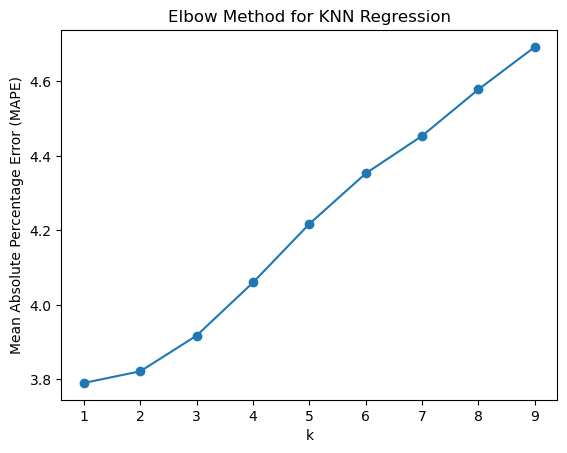

In [79]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# Define a range of k values to try
k_values = range(1, 10)

# List to store the MAPE for each k
mape_scores = []

# Compute the MAPE for each k value on the test set
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)*100
    mape_scores.append(mape)

# Plot the MAPE values against the k values
plt.plot(k_values, mape_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.title('Elbow Method for KNN Regression')
plt.show()




### Best Value of k
 Best Value of k is 1 mape is lowest at k=2

 

In [80]:
X = df_Selected
y  = df['price1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print('Shape of X_train_selected :',X_train.shape)
print('Shape of y_train_selected :',y_train.shape)
print('Shape of X_test_selected :',X_test.shape)
print('Shape of y_test_selected :',y_test.shape)
print('Number of Features are :',len(X_train.columns))

Shape of X_train_selected : (33188, 6)
Shape of y_train_selected : (33188,)
Shape of X_test_selected : (14224, 6)
Shape of y_test_selected : (14224,)
Number of Features are : 6


In [81]:
# Create and fit the KNN regression model
k =2# Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train,y_train)

# Predicting for Training Dataset
train_pred_knn=knn_model.predict(X_train)

#Calculating the R-Square for training set
train_rsquare_knn=r2_score(y_train,train_pred_knn)
print(f'Train R-Square  : {train_rsquare_knn}')

# calculating the adjusted r2 for training set
#formula: 1-((1-R2)(n-1)/(n-k-1))
#where n= No. of samples (no.of datapoints)
Adj_r2 = 1 - (1-r2_score(y_train, train_pred_knn)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('Adjusted R2 Train : ',Adj_r2)


# Calculating MAPE for train
train_mape_knn=np.mean(abs((y_train-train_pred_knn)/y_train))*100
print('Train MAPE :', train_mape_knn)



#Predicting for Test Set
test_pred_knn=knn_model.predict(X_test)

#Calculating the R-Square for test set
test_rsquare_knn=r2_score(y_test,test_pred_knn)
print(f'Test R-Square   : {test_rsquare_knn}')

# Calculating for Test Dataset
test_mape_knn=np.mean(abs((y_test-test_pred_knn)/y_test))*100
print('Test MAPE :', test_mape_knn)

Train R-Square  : 0.9408684890669445
Adjusted R2 Train :  0.9408577965300832
Train MAPE : 1.8873846602916762
Test R-Square   : 0.777051575126688
Test MAPE : 3.8216253739372235


# Model-3 : Decision Tree 

### Base Line Model 

In [82]:
X = df_Selected
y  = df['price1']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print('Shape of X_train_selected :',X_train.shape)
print('Shape of y_train_selected :',y_train.shape)
print('Shape of X_test_selected :',X_test.shape)
print('Shape of y_test_selected :',y_test.shape)
print('Number of Features are :',len(X_train.columns))

Shape of X_train_selected : (33188, 6)
Shape of y_train_selected : (33188,)
Shape of X_test_selected : (14224, 6)
Shape of y_test_selected : (14224,)
Number of Features are : 6


In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Create a decision tree regressor object
dt_regressor = DecisionTreeRegressor()

# Define the hyperparameter grid
param_grid = {
    'criterion': ['mae'],  # Splitting criterion
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5)
#grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
#best_params = grid_search.best_params_


# Print the best hyperparameters
#print("Best Hyperparameters:", best_params)

In [85]:
from sklearn.tree import DecisionTreeRegressor

best_params={'criterion': 'mae', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
best_model = DecisionTreeRegressor(**best_params)
# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate R-squared for the training and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared for the training and test sets
train_adj_r2 = 1 - (1 - train_r2) * (len(y_train) - 1) / (len(y_train) - num_features - 1)
test_adj_r2 = 1 - (1 - test_r2) * (len(y_test) - 1) / (len(y_test) - num_features - 1)

# Calculate MAPE for the training and test sets
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)*100
test_mape_dt = mean_absolute_percentage_error(y_test, y_test_pred)*100

# Print the evaluation metrics
print("Train R-squared:", train_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Train MAPE:", train_mape)

print("Test R-squared:", test_r2)
print("Test Adjusted R-squared:", test_adj_r2)
print("Test MAPE:", test_mape_dt)

Train R-squared: 0.9907535566932387
Train Adjusted R-squared: 0.9907518846923997
Train MAPE: 0.7303382644516034
Test R-squared: 0.983264604627846
Test Adjusted R-squared: 0.9832575417895375
Test MAPE: 1.1520720120597516


### Feature selection using RFE

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE

# Create a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor()

# Create RFE object with the regressor
rfe_dt = RFE(estimator=dt_regressor, n_features_to_select=None)

# Perform RFE feature selection
X_selected_dt = rfe_dt.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices_dt = rfe_dt.get_support(indices=True)

# Print the selected feature indices and names
selected_feature_names_dt = X_train.columns[selected_feature_indices_dt]
print("Selected Feature Indices:", selected_feature_indices_dt)
print("Selected Feature Names:", selected_feature_names_dt)
print("Number of Selected Features before RFE:", len(X_train.columns))
print("Number of Selected Features after RFE:", len(selected_feature_names_dt))


Selected Feature Indices: [0 2 3]
Selected Feature Names: Index(['carat', 'color', 'clarity'], dtype='object')
Number of Selected Features before RFE: 6
Number of Selected Features after RFE: 3


In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE


# Create a Decision Tree Regressor with best parameters
dt_regressor = DecisionTreeRegressor(**best_params)

# Create RFE object with the regressor and the number of features to select
rfe = RFE(estimator=dt_regressor, n_features_to_select=None)

# Perform RFE feature selection
X_selected = rfe.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = rfe.get_support(indices=True)

# Select the corresponding features from the training and test sets
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

# Build the Decision Tree model using the selected features
dt_model = DecisionTreeRegressor(**best_params)
dt_model.fit(X_train_selected, y_train)

# Predict on the training and test sets
y_train_pred = dt_model.predict(X_train_selected)
y_test_pred = dt_model.predict(X_test_selected)

# Calculate R-squared for the training and test sets
train_r2 = dt_model.score(X_train_selected, y_train)
test_r2 = dt_model.score(X_test_selected, y_test)

# Calculate MAPE for the training and test sets
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
test_mape_dt_selected= np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print the results
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train MAPE:", train_mape)
print("Test MAPE:", test_mape_dt_selected)


Train R-squared: 0.9863497160202553
Test R-squared: 0.9839686715064601
Train MAPE: 0.9998924552404604
Test MAPE: 1.1310918565709476


# Model Peformace

In [90]:
data = {'Model': ['Linear Reg', 'Knn','DT'],
        'Test MAPE': [test_mape_lr_selected,test_mape_knn,test_mape_dt_selected]
        }
df_performace=pd.DataFrame(data)
df_performace

,Model,Test MAPE
0,Linear Reg,2.690112
1,Knn,3.821625
2,DT,1.131092


### Inferences
Decision Tree algorithm gave us best results and the MAPE was 1.13 %.

